In [4]:
cat data/WISDM_ar_v1.1_raw_about.txt

raw_about.txt for WISDM_Act_v1.1 dataset

See readme.txt for information about the WISDM Lab, rights,
and other general information.

Associated tasks: classification
Number of examples: 1,098,207
Number of attributes: 6
Missing attribute values: None
Class distribution: {
	Walking -> 424,400 -> 38.6%,
	Jogging -> 342,177 -> 31.2%,
	Upstairs -> 122,869 -> 11.2%,
	Downstairs -> 100,427 -> 9.1%,
	Sitting -> 59,939 -> 5.5%,
	Standing -> 48,395 -> 4.4% }

raw.txt follows this format:
[user],[activity],[timestamp],[x-acceleration],[y-accel],[z-accel];

This line is a representative example:
33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;

Sampling rate: 
20Hz (1 sample every 50ms)

Fields:
*user
	nominal, 1..36

*activity
	nominal, {
		Walking
		Jogging
		Sitting
		Standing
		Upstairs
		Downstairs }

*timestamp
	numeric, generally the phone's uptime in nanoseconds
		(In future datasets this will be miliseconds
		since unix epoch.)

*x-acceleration
	numeric, floating-point values 

In [5]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns

df = pd.read_csv('data/WISDM_ar_v1.1_raw.txt', header=None, names=['user', 'label', 'timestamp', 'x', 'y', 'z'], comment=';')
df = df.sort_values('timestamp')


In [6]:
df.tail()

,user,label,timestamp,x,y,z
1052816,7,Sitting,209397161469000,-6.74,-3.21,6.63
1052817,7,Sitting,209397201539000,-6.85,-3.26,6.63
1052818,7,Sitting,209397241517000,-6.85,-3.30,6.66
1052819,7,Sitting,209397321687000,-7.01,-3.17,6.36
1052820,7,Sitting,209397361451000,-6.85,-2.87,6.51


In [7]:
print 'labels:', df.label.unique()

labels: ['Walking' 'Jogging' 'Upstairs' 'Downstairs' 'Standing' 'Sitting']


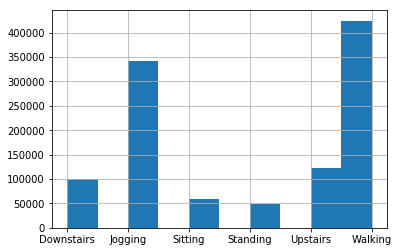

In [9]:
df.label.hist()
plt.show()

In [28]:
# The Label to explore, one of 'Walking' 'Jogging' 'Upstairs' 'Downstairs' 'Standing' 'Sitting'
LABEL = 'Jogging' 

# The maximum number of plots to show
MAX_PLOTS = 1

# The sampling rate to use
SAMPLING_RATE = 20.0


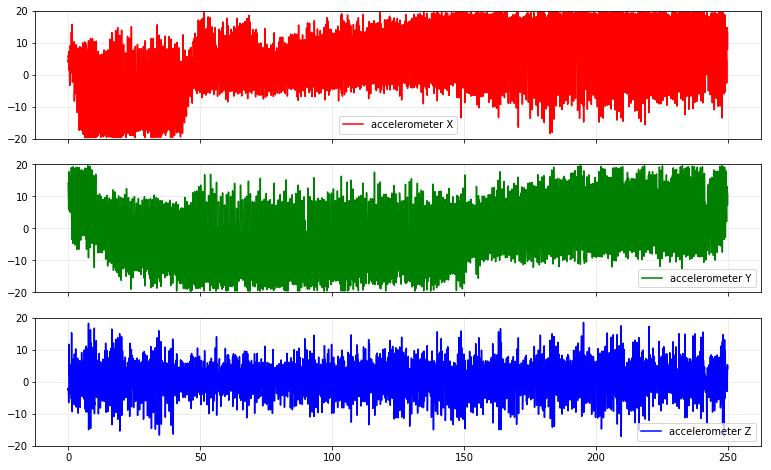

In [29]:
import numpy as np
from utils import sliding_window, split_user_df
from preprocessing import resample_df

# Filter DataFrame with selected label
label_df = df[(df.label == LABEL)].reset_index(drop=True)

# Split the label DataFrame per user
users = label_df.groupby('user')
plt_idx = 0
for user, user_df in users:
    
    # Split the user DataFrame per recording session
    splits = split_user_df(user_df)
    
    if plt_idx == MAX_PLOTS:
        break

    for split_df in splits:
        
        if plt_idx == MAX_PLOTS:
            break
        
        # Calculate the timestamp index in seconds
        ts =(split_df.timestamp - split_df.timestamp.iloc[0]) / 1e9

        if ts.iloc[-1] < 10:
            # Skip sessions that are smaller than 10 seconds
            continue
        
        # Resample the DataFrame to SAMPLING_RATE
        split_df = resample_df(split_df, SAMPLING_RATE)
        
        # Recalculate the timestamp index in seconds
        ts =(split_df.timestamp - split_df.timestamp.iloc[0]) / 1e9
        
        f, axes = plt.subplots(3, figsize=(13, 8), sharex=True)

        # plot each axis separately
        axes[0].plot(ts, split_df.x, c='r', label='accelerometer X')
        axes[1].plot(ts, split_df.y, c='g', label='accelerometer Y')
        axes[2].plot(ts, split_df.z, c='b', label='accelerometer Z')

        for ax in axes:
            # Fix the Y axis limits
            ax.set_ylim([-20, 20])
            
            # Plot the grid
            ax.grid(color='#ededed', linestyle='-', linewidth=1)
            
            # Plot the legend
            ax.legend()

        # Show the plot
        plt.show()
        plt_idx += 1
